In [ ]:
import torch
print("Torch version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())

import ultralytics
print("Ultralytics version:", ultralytics.__version__)

import roboflow
print("Roboflow version:", roboflow.__version__)


In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Imports

In [4]:
from roboflow import Roboflow
# from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="VCevAEcFL0sYcXK3HkUv")
project = rf.workspace("roboflow-jvuqo").project("football-ball-detection-rejhg")
version = project.version(4)
dataset = version.download("yolov11")
                

**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



## Custom training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\data.yaml" batch=12 epochs=25 imgsz=1280 plots=True device=0 verbose=True project="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results" name="football_training_ball_b12_e25_s"

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
Ultralytics 8.3.69 🚀 Python-3.8.8 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\data.yaml, epochs=25, time=None, patience=100, batch=12, imgsz=1280, save=True, save_period=-1, cache=False, device=0, workers=8, project=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results, name=football_training_ball_b12_e25_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals


train: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\train\labels.cache... 3956 images, 2945 backgrounds, 0 corrupt: 100%|██████████| 3956/3956 [00:00<?, ?it/s]
train: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\train\labels.cache... 3956 images, 2945 backgrounds, 0 corrupt: 100%|██████████| 3956/3956 [00:00<?, ?it/s]

val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\valid\labels.cache... 492 images, 365 backgrounds, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\valid\labels.cache... 492 images, 365 backgrounds, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]
       1/25      13.1G      3.213      231.9      1.332          9       1280:   0%|          | 0/330 [00:01<?, ?it/s]
       1/25      13.1G      3.213      231.9      1.332   

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


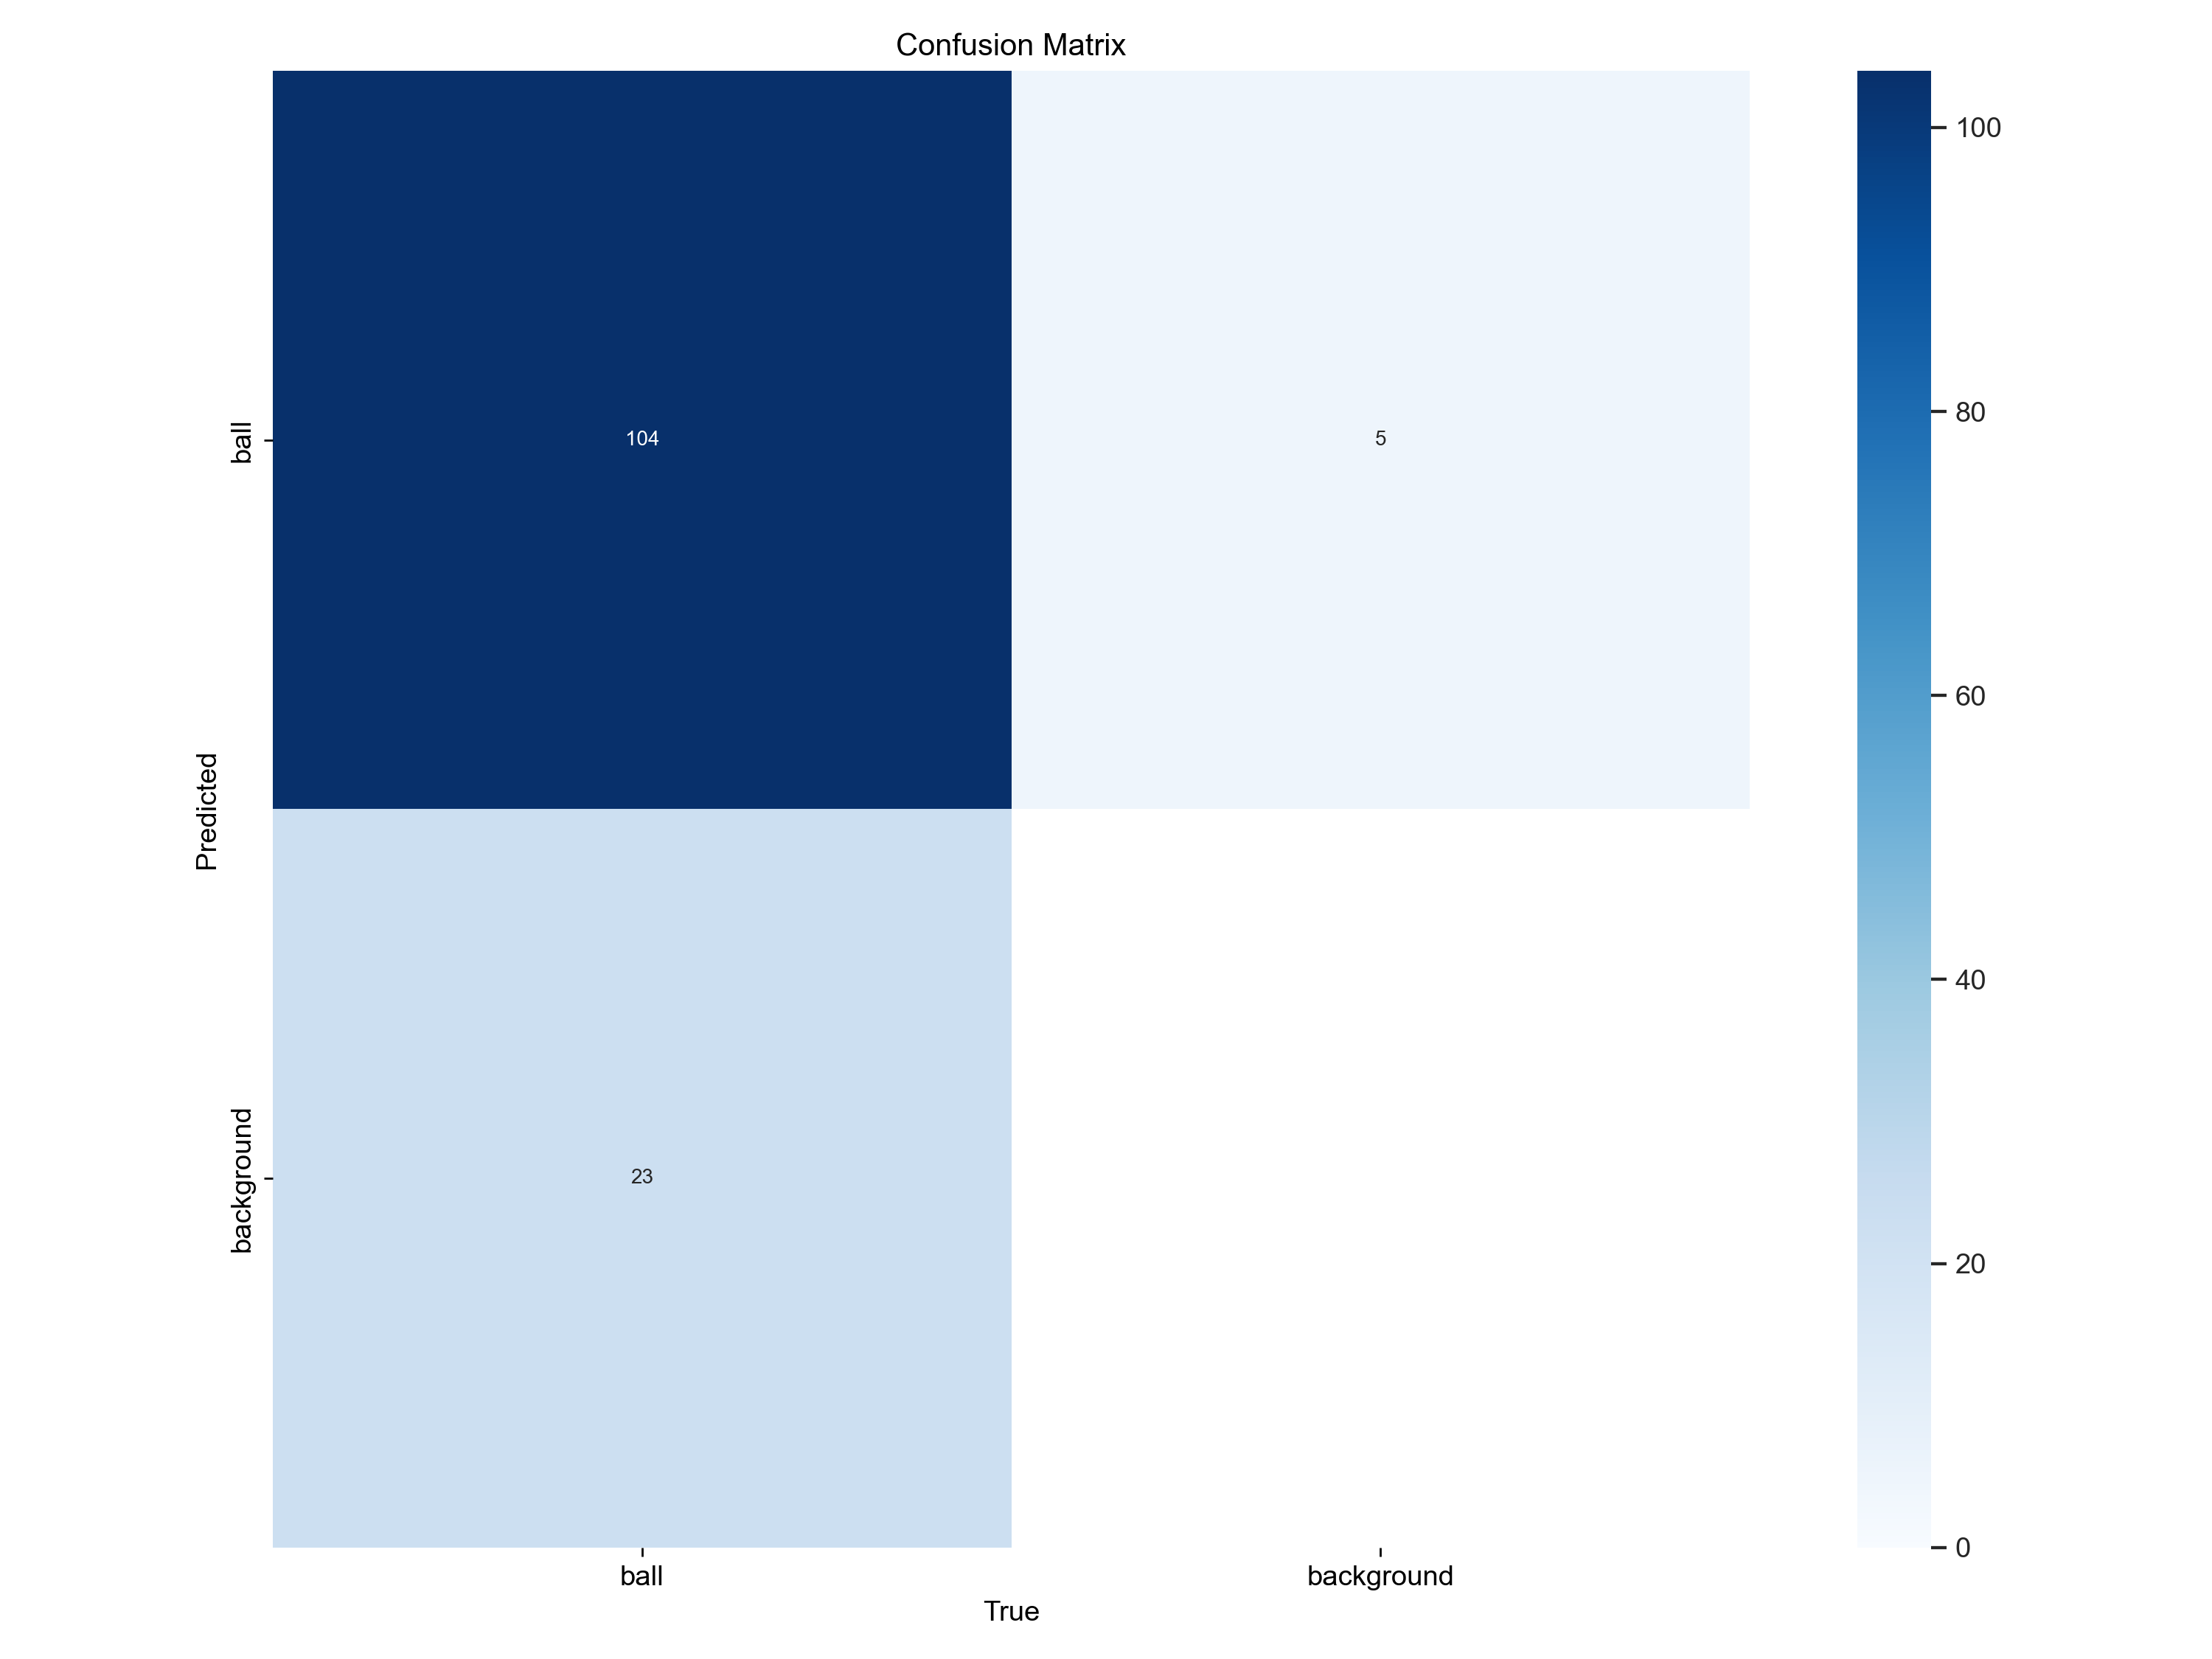

In [6]:
%cd {HOME}
Image(filename=r'Results/football_training_ball_b12_e25_s/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


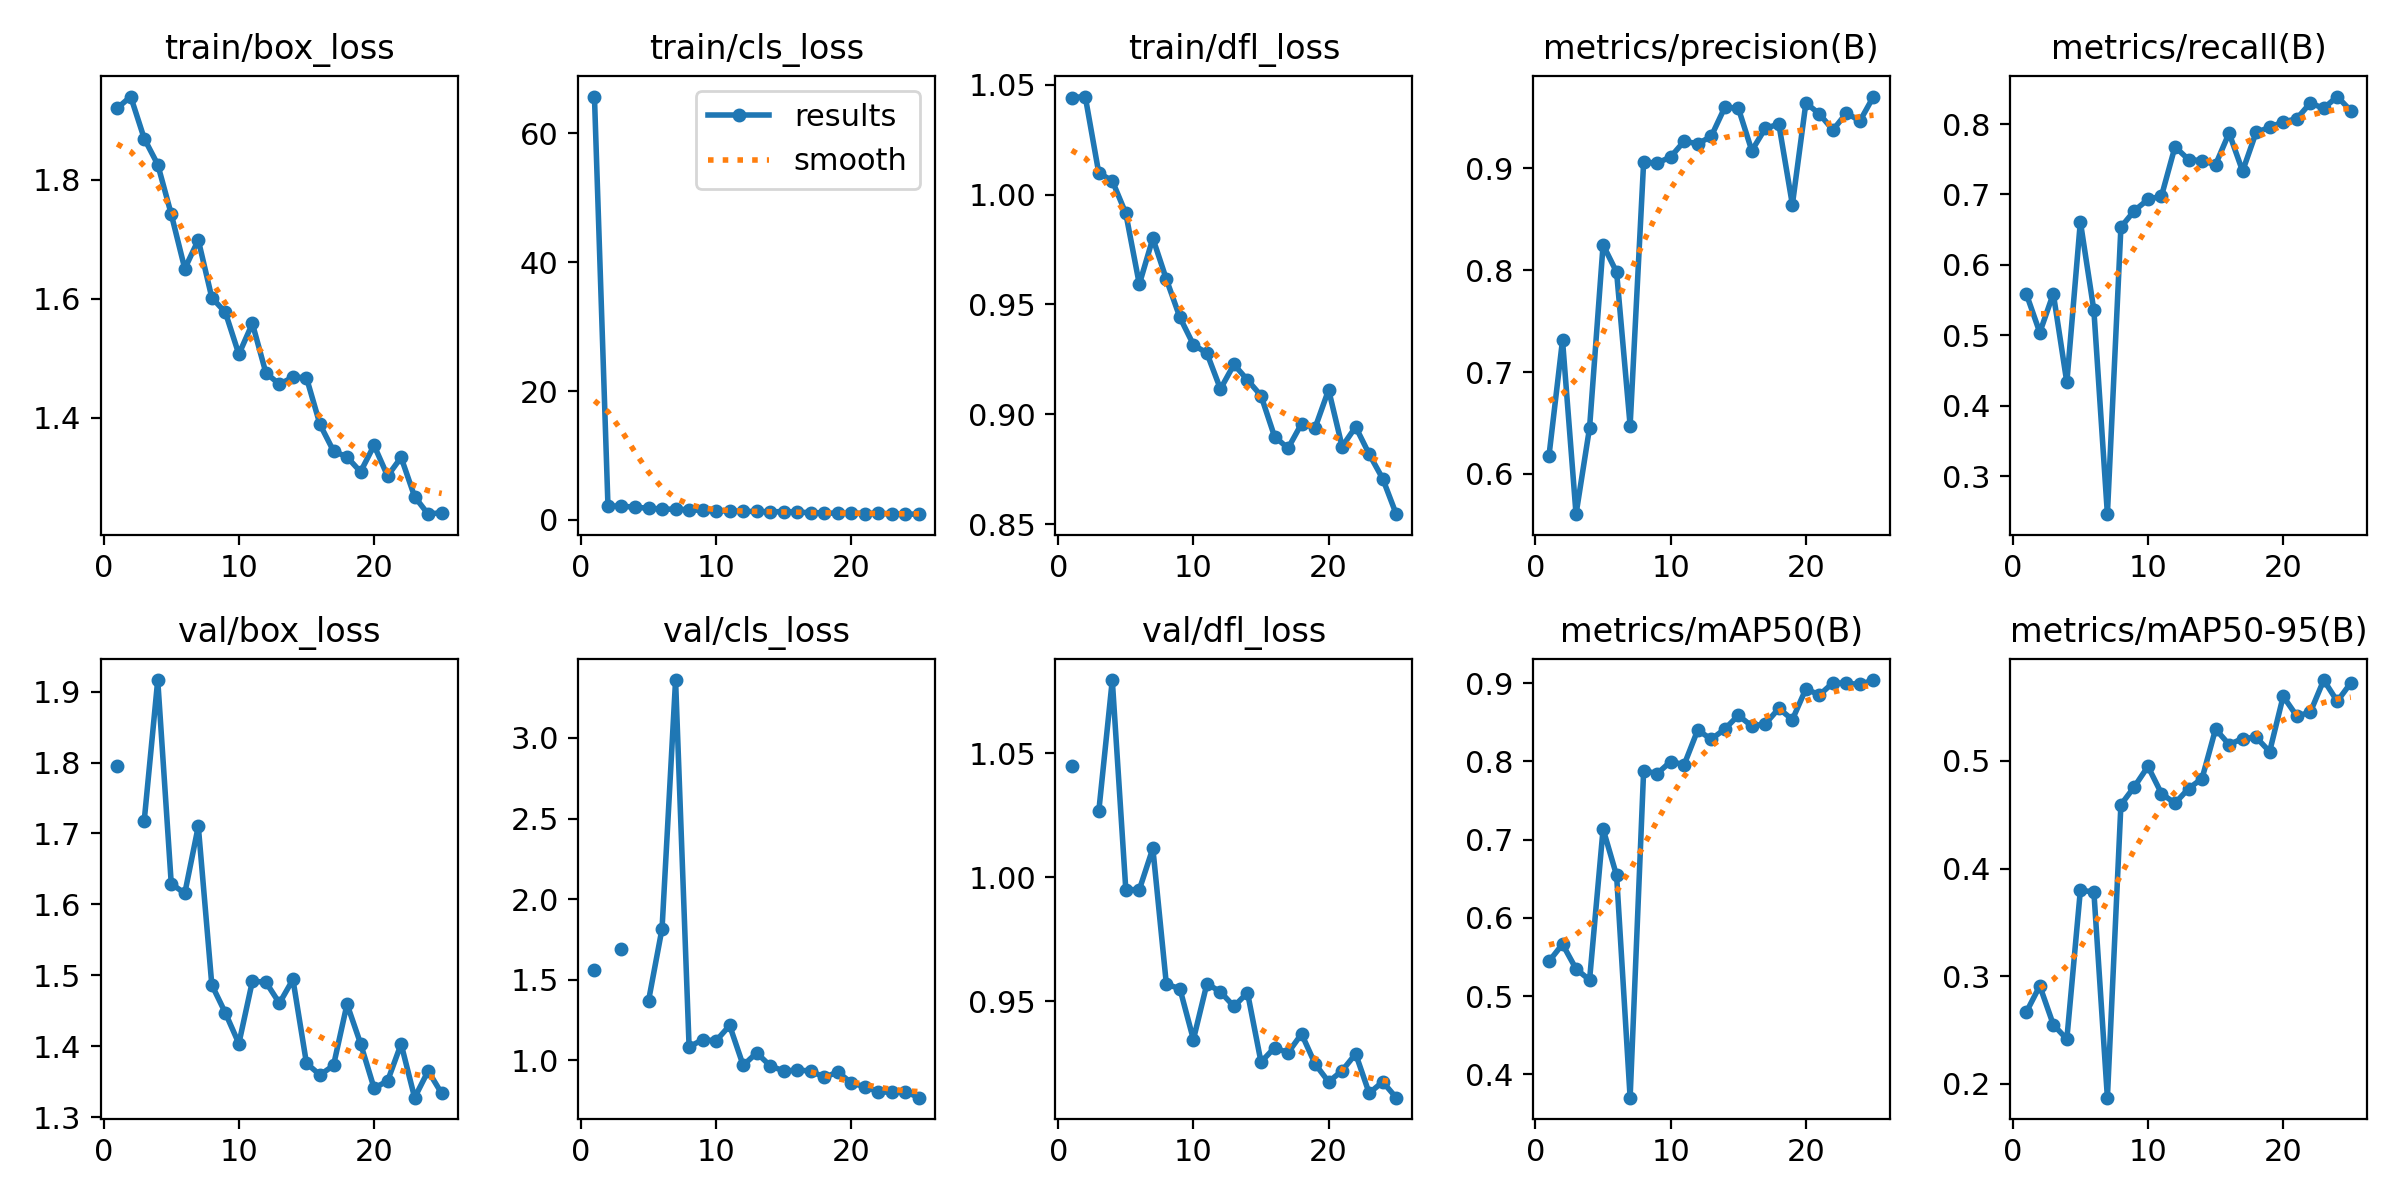

In [8]:
%cd {HOME}
Image(filename=r'Results/football_training_ball_b12_e25_s/results.png', width=600)

## Validate custom model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results\football_training_ball_b12_e25_s\weights\best.pt" data="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\data.yaml" imgsz=1280

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
Ultralytics 8.3.69 🚀 Python-3.8.8 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
                   all        492        127      0.954      0.822      0.901      0.581
Speed: 1.3ms preprocess, 6.2ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to d:\adithya\runs\detect\val7
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\valid\labels.cache... 492 images, 365 backgrounds, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]
val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-ball-detection-4\valid\labels.cache... 492 images, 365 backgrounds, 0 corrupt: 100%|██████████| 492/492 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/31 [00:00<00:24,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▋         | 2/31 [00:01<00:15,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|▉         | 3/31 [00:01<00:10,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mA